In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

### 데이터셋 준비

In [3]:
exp = pd.read_csv("G:/내 드라이브/노트북/23-겨울/빅데이터_미래사회/data/0220_참여경험.csv", encoding='cp949')
will = pd.read_csv("G:/내 드라이브/노트북/23-겨울/빅데이터_미래사회/data/0220_참여의향.csv", encoding='cp949')
economy = pd.read_csv("G:/내 드라이브/노트북/23-겨울/빅데이터_미래사회/data/0220_경제활동상태.csv", encoding='cp949')

In [4]:
exp.columns = exp.iloc[0]
exp = exp[1:]

will.columns = will.iloc[0]
will = will[1:]

economy.columns = economy.iloc[0]
economy = economy[1:]

### 참여 의향 시각화

In [5]:
will = will.drop('특성별(1)', axis = 1)

In [6]:
will = will.astype(float)

In [7]:
will

,전체 (명),예 (%),노인일자리가 아닌 민간사업체(회사 기업 자영업 등)에서 일하고 싶음 (%),아무 일도 하고 싶지 않음 (%),기타 (%)
1,3596.0,95.7,1.6,2.5,0.2


In [8]:
will_2 = pd.DataFrame({
    '예': will.iloc[:, 1:3].sum(axis=1),
    '아니오': will.iloc[:, 3:5].sum(axis=1)
})

will_2

,예,아니오
1,97.3,2.7


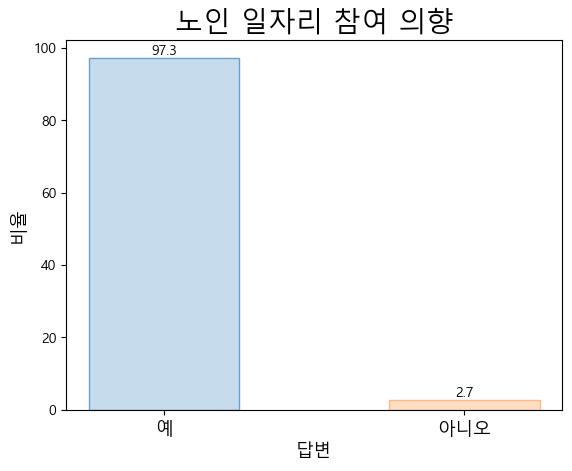

In [9]:
color=['#C6DCEC', '#FFDEC2']
edgecolor=['#67A0C9', '#FFB985']
label = will_2.columns
width = 0.5

bars = plt.bar(label, will_2.iloc[0], color=color, edgecolor = edgecolor, width=width)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

plt.title('노인 일자리 참여 의향', fontsize=20)
plt.xlabel('답변', fontsize=13)
plt.ylabel('비율', fontsize=13)
plt.xticks(fontsize=13)

plt.show()

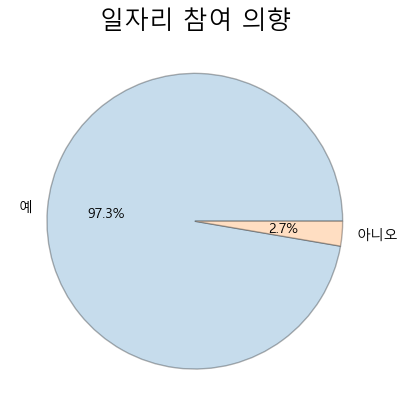

In [17]:
colors=['#C6DCEC', '#FFDEC2']

plt.pie(will_2.values[0], labels = will_2.columns, autopct='%1.1f%%',
        wedgeprops={'edgecolor': (0, 0, 0, 0.3)}, colors = colors)
plt.title("일자리 참여 의향", fontsize=18)

plt.show()

### 경제활동 비율

In [37]:
economy

,행정구역별,성별,연령별,1인가구(15세 이상),일하였음-계,주로 일하였음,틈틈이 일하였음,일시 휴직,일하지 않았음
1,전국,계,합계,6642988,4109902,3741683,247730,120489,2533086
2,전국,계,15~19세,71753,20264,8819,11046,399,51489
3,전국,계,20~24세,496119,253801,163836,84586,5379,242318
4,전국,계,25~29세,775110,635578,575367,45701,14510,139532
5,전국,계,30~34세,618316,545083,509702,20498,14883,73233
6,전국,계,35~39세,497027,430971,405180,10727,15064,66056
7,전국,계,40~44세,427257,360478,338440,8604,13434,66779
8,전국,계,45~49세,476499,387582,363619,10303,13660,88917
9,전국,계,50~54세,497959,382982,360149,10114,12719,114977
10,전국,계,55~59세,541536,375025,352582,10701,11742,166511


In [38]:
economy = economy.drop(['행정구역별', '성별', '연령별'], axis = 1)
economy

,1인가구(15세 이상),일하였음-계,주로 일하였음,틈틈이 일하였음,일시 휴직,일하지 않았음
1,6642988,4109902,3741683,247730,120489,2533086
2,71753,20264,8819,11046,399,51489
3,496119,253801,163836,84586,5379,242318
4,775110,635578,575367,45701,14510,139532
5,618316,545083,509702,20498,14883,73233
6,497027,430971,405180,10727,15064,66056
7,427257,360478,338440,8604,13434,66779
8,476499,387582,363619,10303,13660,88917
9,497959,382982,360149,10114,12719,114977
10,541536,375025,352582,10701,11742,166511


In [39]:
economy = economy.astype(int)

In [40]:
economy.iloc[11] = economy.iloc[11] + economy.iloc[12]

In [41]:
economy = economy.drop(13)
economy

,1인가구(15세 이상),일하였음-계,주로 일하였음,틈틈이 일하였음,일시 휴직,일하지 않았음
1,6642988,4109902,3741683,247730,120489,2533086
2,71753,20264,8819,11046,399,51489
3,496119,253801,163836,84586,5379,242318
4,775110,635578,575367,45701,14510,139532
5,618316,545083,509702,20498,14883,73233
6,497027,430971,405180,10727,15064,66056
7,427257,360478,338440,8604,13434,66779
8,476499,387582,363619,10303,13660,88917
9,497959,382982,360149,10114,12719,114977
10,541536,375025,352582,10701,11742,166511


In [42]:
economy = economy.drop(['주로 일하였음', '틈틈이 일하였음', '일시 휴직'], axis = 1)
economy

,1인가구(15세 이상),일하였음-계,일하지 않았음
1,6642988,4109902,2533086
2,71753,20264,51489
3,496119,253801,242318
4,775110,635578,139532
5,618316,545083,73233
6,497027,430971,66056
7,427257,360478,66779
8,476499,387582,88917
9,497959,382982,114977
10,541536,375025,166511


In [43]:
economy

,1인가구(15세 이상),일하였음-계,일하지 않았음
1,6642988,4109902,2533086
2,71753,20264,51489
3,496119,253801,242318
4,775110,635578,139532
5,618316,545083,73233
6,497027,430971,66056
7,427257,360478,66779
8,476499,387582,88917
9,497959,382982,114977
10,541536,375025,166511


In [44]:
economy_2 = economy.iloc[11]
economy_2

0
1인가구(15세 이상)    1660711
일하였음-계           394036
일하지 않았음         1266675
Name: 12, dtype: int32

In [45]:
# 비율 계산
economy_2['유직'] = economy_2['일하였음-계'] / economy_2['1인가구(15세 이상)']
economy_2['무직'] = economy_2['일하지 않았음'] / economy_2['1인가구(15세 이상)']

In [46]:
economy_2

0
1인가구(15세 이상)    1.660711e+06
일하였음-계          3.940360e+05
일하지 않았음         1.266675e+06
유직              2.372695e-01
무직              7.627305e-01
Name: 12, dtype: float64

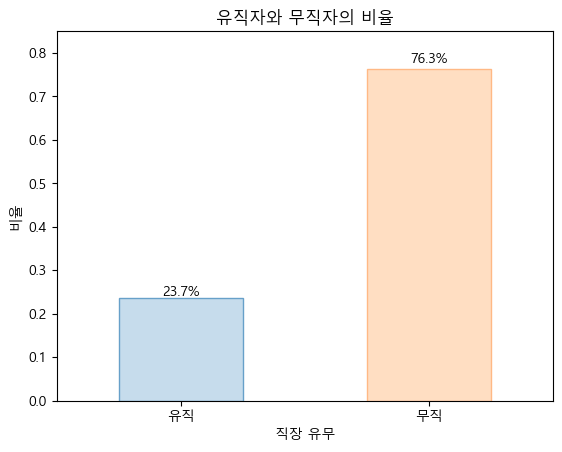

In [47]:
ax = economy_2[["유직", "무직"]].plot(kind='bar', color=['#C6DCEC', '#FFDEC2'], edgecolor=['#67A0C9', '#FFB985'])

plt.title('유직자와 무직자의 비율')
plt.xlabel('카테고리')
plt.ylabel('비율')

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.1%}', (x + width/2, y + height*1.02), ha='center')

plt.ylim(0,0.85)
plt.xlabel('직장 유무')
plt.xticks(rotation=0)
plt.show()

### 일자리 참여 경험

In [15]:
exp

,특성별(1),응답자수 (명),현재 참여 중 (%),참여 경험 있음 (%),신청했으나 참여기회 없었음 (%),비신청 (%)
1,전체,10097,7.9,5.9,5.9,80.3


In [16]:
exp = exp.drop('특성별(1)', axis = 1)
exp

,응답자수 (명),현재 참여 중 (%),참여 경험 있음 (%),신청했으나 참여기회 없었음 (%),비신청 (%)
1,10097,7.9,5.9,5.9,80.3


In [20]:
exp = exp.drop('응답자수 (명)', axis = 1)

In [21]:
exp = exp.astype(float)

In [22]:
exp

,현재 참여 중 (%),참여 경험 있음 (%),신청했으나 참여기회 없었음 (%),비신청 (%)
1,7.9,5.9,5.9,80.3


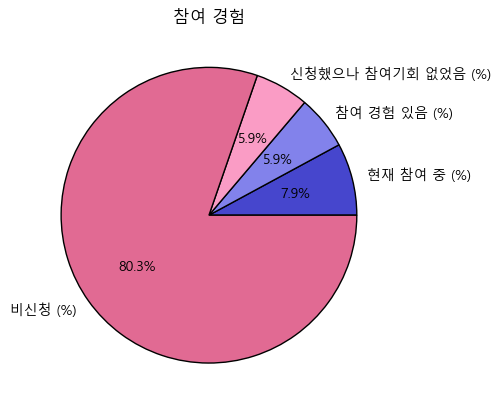

In [28]:
colors = ['#4646CD', '#8282EB', '#FA9CC5', '#E16A93']

plt.pie(exp.values[0], labels = exp.columns, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'}, colors = colors)
plt.title("참여 경험")

plt.show()